In [1]:
%%html 
<style>
    table {
        display: inline-block;
        border:solid;
        margin:5%;
        margin-bottom: 20%;
    }
</style>

Kathleen Malone

kmalone36

Step 1 - download dataset

Step 2

Protected Classes

I identified the following protected classes and members with the class in the dataset:

Protected Class

Sex - male, female, straight, heterosexual, lesbian, gay, bisexual, transgender, trans, queer, lgbt, lgbtq, homosexual, nonbinary

I included nationalities in race. I put european and canadian into white.

Race - white, european, canadian, african, african american, black,hispanic, latino, latina, latinx, mexican, asian, indian, middle eastern, chinese, japanese

Religion - Christian, Protestan, "Muslim, Jewish, Buddhist, Catholic, Sikh, Taoist

Age - young, younger, teenage, millenial, middle aged, old, older, elderly

Disability Status - blind, deaf, paralyzed



In [2]:
#Step 3

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("toxity_per_attribute.csv")
#found rows with all False through python and deleted them in Excel
#Code used 
# indices = []
# for index, row in df.iterrows():
#     if (df.iloc[index,2:] == 0).all() == True:
#         indices.append(index)
    

In [3]:
#Replace all False with 0 and all True with 1
df = df.replace(True, 1)
df = df.replace(False, 0)

#Create orderings for sex
#1 for male, straight, heterosexual
#2 for female
#3 for other
df['female'].replace({1:2}, inplace=True)
cols = ["lesbian", "gay", "bisexual", "transgender", "trans", "queer", "lgbt", "lgbtq", "homosexual", "nonbinary"]
df[cols] = df[cols].replace({1:3})

sex = pd.DataFrame(df.iloc[:,2:16])
df['pc_sex'] = 0
maxv = df.iloc[:,2:16].max(axis=1)
df['pc_sex']=maxv
#df['pc_sex']

In [4]:
#Create orderings for race
#1 for white, american, european, canadian
#2 for black, hispanic, asian
race = pd.DataFrame(df.iloc[:,16:33])
cols = ["african", "african american", "black","hispanic", "latino", "latina", "latinx", "mexican","asian", "indian", "middle eastern", "chinese", "japanese" ]
df[cols] = df[cols].replace({1:2})

df['pc_race'] = 0
maxv = df.iloc[:,16:33].max(axis=1)
df['pc_race']=maxv
#df['pc_race']

In [5]:
#Create religion protected class
#1 for christian, protestan
#2 for other
cols = ["muslim", "jewish", "buddhist", "catholic", "sikh", "taoist"]
df[cols] = df[cols].replace({1:2})

df['pc_religion'] = 0
maxv = df.iloc[:,33:41].max(axis=1)
df['pc_religion']=maxv
#df['pc_religion']


In [6]:
#Create age protected class
#1 for young, younger, teenage, millenial, middle aged
#2 for old, older, elderly
cols = ["old", "older", "elderly"]
df[cols] = df[cols].replace({1:2})

df['pc_age'] = 0
maxv = df.iloc[:,41:49].max(axis=1)
df['pc_age']=maxv
#df['pc_age']



In [7]:
#Create disability protected class
#1 for blind deaf paralyzed
# disability = pd.DataFrame(df.iloc[:,49:])
# disability.head()
df['pc_disability'] = 0
maxv = df.iloc[:,49:52].max(axis=1)
df['pc_disability']=maxv
#df['pc_disability']

In [8]:
df_small = pd.DataFrame(df.iloc[:,52:])
df_small['TOXICITY'] = df['TOXICITY']
#df_small.head()


In [9]:
df_small[df_small.columns[0:]].corr()['TOXICITY'][:]
      

pc_sex           0.186217
pc_race         -0.128406
pc_religion      0.002672
pc_age          -0.040504
pc_disability    0.022562
TOXICITY         1.000000
Name: TOXICITY, dtype: float64

Step 3

Correlation Coefficients:

|                      | Sex       | Race      | Relgion   | Age       | Disability Status |
|----------------------|-----------|-----------|-----------|-----------|-------------------|
| Toxicity             | 0.186217  | -0.128406  | 0.002672  | -.040504   | 0.022562          |
| Correlation Strength | Very weak | Very weak | Very weak | Very weak | Very weak         |

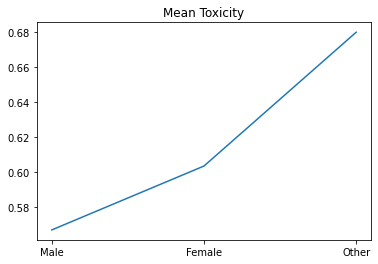

In [10]:
males = df_small.loc[df_small['pc_sex'] == 1]
mean_m = np.mean(males['TOXICITY'])
females = df_small.loc[df_small['pc_sex'] == 2]
mean_f = np.mean(females['TOXICITY'])
others = df_small.loc[df_small['pc_sex'] == 3]
mean_o = np.mean(others['TOXICITY'])

means = [mean_m, mean_f, mean_o]
x = [1,2,3]
plt.plot(x,means)
plt.title('Mean Toxicity')
plt.xlabel('')
plt.ylabel('')
plt.xticks(x,["Male", 'Female', 'Other'])
plt.show()
            
            

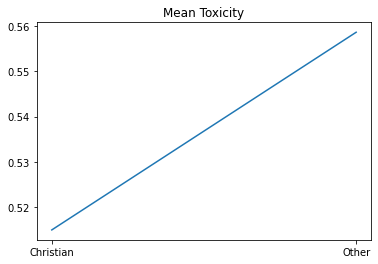

In [11]:
christian = df_small.loc[df_small['pc_religion'] == 1]
mean_m = np.mean(christian['TOXICITY'])
others = df_small.loc[df_small['pc_religion'] == 2]
mean_o = np.mean(others['TOXICITY'])

means = [mean_m, mean_o]
x = [1,2]
plt.plot(x,means)
plt.title('Mean Toxicity')
plt.xlabel('')
plt.ylabel('')
plt.xticks(x,["Christian", 'Other'])
plt.show()

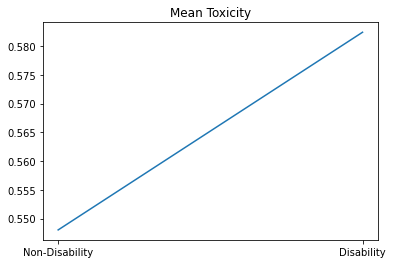

In [12]:
disability = df_small.loc[df_small['pc_disability'] == 1]
mean_m = np.mean(disability['TOXICITY'])
others = df_small.loc[df_small['pc_disability'] == 0]
mean_o = np.mean(others['TOXICITY'])

means = [mean_o, mean_m]
x = [0,1]
plt.plot(x,means)
plt.title('Mean Toxicity')
plt.xlabel('')
plt.ylabel('')
plt.xticks(x,["Non-Disability", 'Disability'])
plt.show()

In [13]:
toxicity_mean = np.mean(df_small['TOXICITY'])
toxicity_mean

0.550101802360502

In [14]:
toxicity_std = np.std(df_small['TOXICITY'])
toxicity_std

0.3618500748261417

In [15]:
#95% of toxicity lies within
minus_mean = toxicity_mean - (2*toxicity_std)
minus_mean


-0.17359834729178136

In [16]:
plus_mean = toxicity_mean + (2*toxicity_std)
plus_mean

1.2738019520127852

In [17]:
#Random sampling with 10% of data
sample_10 = df.sample(frac=0.1, replace=True, random_state=1)
sample_50 = df.sample(frac=0.6, replace=True, random_state=1)
toxicity_mean = np.mean(sample_10['TOXICITY'])
toxicity_mean

0.5577070249483488

In [18]:

toxicity_std = np.std(sample_10['TOXICITY'])
toxicity_std

0.3607463113653914

In [19]:
1/np.sqrt(7570)

0.011493493650809091

In [20]:
#Now run on 50% sample
toxicity_mean = np.mean(sample_50['TOXICITY'])
toxicity_mean

0.5497945882339278

In [21]:
toxicity_std = np.std(sample_50['TOXICITY'])
toxicity_std

0.3614183558843998

In [22]:
1/np.sqrt(37850)


0.005140046620434272

Step 4

The population mean of the reduced data set of TOXICITY is 0.550101802360502

The standard deviation of TOXICITY is 0.3618500748261417

The range of values around the mean that includes 95% of TOXICITY is between -0.17245489899620792 and 1.2732427034443452

Since TOXICITY only ranges between 0 and 1 the values would be between 0 and 1.


The population mean of 10% of the data set of TOXICITY is 0.5577070249483488

The standard deviation of TOXICITY is 0.3607463113653914

The margin of error is 1 / square root of the sample size which is 1.1% 


The population mean of 60% of the data set of TOXICITY is 0.5497945882339278

The standard deviation of TOXICITY is 0.3614183558843998

The margin of error is 1 / square root of the sample size which is .5% 

In [23]:
df_sex_tox_only = df[df['pc_sex'] != 0]
toxicity_mean = np.mean(df_sex_tox_only['TOXICITY'])
toxicity_mean


0.6503520611892338

In [24]:
toxicity_std = np.std(df_sex_tox_only['TOXICITY'])
toxicity_std


0.32396048890109536

In [25]:
sample_10 = df_sex_tox_only.sample(frac=0.1, replace=True, random_state=1)
sample_50 = df_sex_tox_only.sample(frac=0.6, replace=True, random_state=1)
toxicity_mean = np.mean(sample_10['TOXICITY'])
toxicity_mean
np.sqrt(2120)


46.04345773288535

In [26]:
toxicity_std = np.std(sample_10['TOXICITY'])
toxicity_std

0.32816834890291524

In [27]:
toxicity_mean = np.mean(sample_50['TOXICITY'])
toxicity_mean

0.6504618345875923

In [28]:
toxicity_std = np.std(sample_50['TOXICITY'])
toxicity_std

0.3234878348744136

In [29]:
(1/np.sqrt(12718)) * 0.6503520611892338 + 0.6503520611892338
0.6503520611892338 - ((1/np.sqrt(12718)) * 0.6503520611892338)
#(1/np.sqrt(10589))

0.6445852051414944

In [30]:
(1/np.sqrt(2120)) * 0.6503520611892338 + 0.6503520611892338
0.6503520611892338 - ((1/np.sqrt(2120)) * 0.6503520611892338)
#(1/np.sqrt(2120))

0.6362273170190162

Step 5

The population mean of the data set with samples where sex is associated with TOXICITY is 0.6503520611892338

The standard deviation of TOXICITY is 0.6503520611892338


The mean of 10% of the data set of TOXICITY is 0.6419847458268868

The standard deviation of TOXICITY is 0.32816834890291524

The margin of error is 1 / square root of the sample size which is 2% 

The does fall within the margin of error
 
    

The mean of 50% of the data set of TOXICITY is 0.6504618345875923

The standard deviation of TOXICITY is 0.3234878348744136

The margin of error is 1 / square root of the sample size which is .9% 

The does fall within the margin of error


In [31]:
df_male = df_sex_tox_only[df_sex_tox_only['pc_sex']==1]
mmean = np.mean(df_male['TOXICITY'])
mmean



0.5668030269667548

In [32]:
mstd = np.std(df_male['TOXICITY'])
mstd

0.34562470725548283

In [33]:
df_female = df_sex_tox_only[df_sex_tox_only['pc_sex']==2]
mmean = np.mean(df_female['TOXICITY'])
mmean

0.6034246170937912

In [34]:
mstd = np.std(df_female['TOXICITY'])
mstd

0.33689552706552583

In [35]:
df_other = df_sex_tox_only[df_sex_tox_only['pc_sex']==3]
mmean = np.mean(df_other['TOXICITY'])
mmean

0.6801095158655218

In [36]:
mstd = np.std(df_other['TOXICITY'])
mstd

0.31071515842608477

In [37]:
sample_10 = df_sex_tox_only.sample(frac=0.1, replace=True, random_state=1)
sample_50 = df_sex_tox_only.sample(frac=0.6, replace=True, random_state=1)
df_male = sample_50[sample_50['pc_sex']==1]
df_female = sample_50[sample_50['pc_sex']==2]
df_other = sample_50[sample_50['pc_sex']==3]
mmean = np.mean(df_male['TOXICITY'])
mmean

0.5723840321936904

In [38]:
mstd = np.std(df_male['TOXICITY'])
mstd

0.3457125982517582

In [39]:
mmean = np.mean(df_female['TOXICITY'])
mmean

0.6205122657784946

In [40]:
mstd = np.std(df_female['TOXICITY'])
mstd

0.3325678588444819

In [41]:
mmean = np.mean(df_other['TOXICITY'])
mmean

0.6770225483724343

In [42]:
mstd = np.std(df_other['TOXICITY'])
mstd

0.3113321321150485

In [43]:
#male 60%
(1/np.sqrt(2726)) * 0.5668030269667548 + 0.5668030269667548
#0.5668030269667548 - ((1/np.sqrt(2726)) * 0.5668030269667548)
#(1/np.sqrt(2726))

0.5776590119810442

In [44]:
#female 60%
(1/np.sqrt(1514)) * 0.6034246170937912 + 0.6034246170937912
#0.5668030269667548 - ((1/np.sqrt(1514)) * 0.5668030269667548)
#(1/np.sqrt(2726))

0.6189327704126901

In [45]:
df_male = sample_10[sample_10['pc_sex']==1]
df_female = sample_10[sample_10['pc_sex']==2]
df_other = sample_10[sample_10['pc_sex']==3]
mmean = np.mean(df_male['TOXICITY'])
mmean

0.5548454222979214

In [46]:
mstd = np.std(df_male['TOXICITY'])
mstd

0.34446592310332474

In [47]:
mmean = np.mean(df_female['TOXICITY'])
mmean

0.6055766939207318

In [48]:
mstd = np.std(df_female['TOXICITY'])
mstd

0.33583001659083667

In [49]:
mmean = np.mean(df_other['TOXICITY'])
mmean

0.670679589950755

In [50]:
mstd = np.std(df_other['TOXICITY'])
mstd

0.3176555281321664

Step 6


The mean of TOXICITY when its associated with males is 0.5668030269667548

The standard deviation of TOXICITY when its associated with males is 0.34562470725548283

The mean of TOXICITY when its associated with females is 0.6034246170937912

The standard deviation of TOXICITY when its associated with females is 0.33689552706552583

The mean of TOXICITY when its associated with all other sub-groups protected by sex is 0.6801095158655218

The standard deviation of TOXICITY when its associated with all other sub-groups protected by sex is 0.31071515842608477


Using 60% of the data

The mean of TOXICITY when its associated with males is 0.5723840321936904

The standard deviation of TOXICITY when its associated with males is 0.3457125982517582

The does fall within the margin of error

The mean of TOXICITY when its associated with females is 0.6034246170937912

The standard deviation of TOXICITY when its associated with females is 0.33689552706552583

The does fall within the margin of error

The mean of TOXICITY when its associated with all other sub-groups protected by sex is 0.670679589950755

The standard deviation of TOXICITY when its associated with all other sub-groups protected by sex is 0.31071515842608477

The does fall within the margin of error


Using 10% of the data

The mean of TOXICITY when its associated with males is 0.5548454222979214

The standard deviation of TOXICITY when its associated with males is 0.34446592310332474

The does fall within the margin of error

The mean of TOXICITY when its associated with females is 0.6055766939207318

The standard deviation of TOXICITY when its associated with females is 0.33583001659083667

The does fall within the margin of error

The mean of TOXICITY when its associated with all other sub-groups protected by sex is 0.6801095158655218

The standard deviation of TOXICITY when its associated with all other sub-groups protected by sex is 0.3176555281321664

The does fall within the margin of error


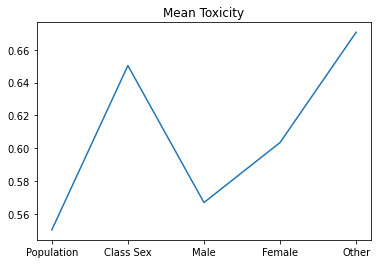

In [51]:
means = [0.550101802360502, 0.6503520611892338, 0.5668030269667548, 0.6034246170937912, 0.670679589950755]
x = [1,2,3,4,5]
plt.plot(x,means)
plt.title('Mean Toxicity')
plt.xlabel('')
plt.ylabel('')
plt.xticks(x,['Population', 'Class Sex', "Male", 'Female', 'Other'])
plt.show()